In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os 
import librosa
import librosa.display
import time
print("SIDD")


SIDD


In [2]:
BASE_DIR="/home/siddhu/Downloads/IBM DATASET"

In [6]:
os.chdir(BASE_DIR)
MAIN_FOLDER=(os.listdir(os.getcwd()))

In [7]:
for i in MAIN_FOLDER:
    SUB_FOLDER=os.path.join(os.getcwd(),i+"/IRMAS dataset/IRMAS-TrainingData")
    print(os.listdir(SUB_FOLDER))

['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['pia', 'cla', 'gel', 'gac', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']


In [47]:
audio_file_path=BASE_DIR+"/IRMAS dataset-20210515T054853Z-001/IRMAS dataset/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__1.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [25]:
# from librosa import feature
# fn_list_i = [
#     feature.chroma_stft,
#     feature.spectral_centroid,
#     feature.spectral_bandwidth,
#     feature.spectral_rolloff,
#     feature.chroma_cqt,
#     feature.chroma_cens,
#     feature.mfcc,
#     feature.spectral_contrast,
#     feature.poly_features,
#     feature.tonnetz
# ]
  
# fn_list_ii = [
#     feature.rms,
#     feature.zero_crossing_rate,
#     feature.spectral_flatness,
# ]

# def get_feature_vector(filename):
#     y,sr=librosa.load(filename)
#     feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
#     feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii]

#     feature_vector =   feat_vect_i + feat_vect_ii  
#     return feature_vector

In [26]:
# feature_vector = get_feature_vector(librosa_audio_data, librosa_sample_rate)

In [48]:
feature_vector

[0.31193614,
 1577.0023176196667,
 1631.2702723489874,
 3275.3658353365386,
 0.5400405383399263,
 0.2730790854729812,
 -6.000355,
 24.455800285598876,
 0.6799661665392149,
 0.0024512848848283523,
 0.058627985,
 0.08984375,
 0.00057763525]

In [49]:
vector=np.array(feature_vector)

In [50]:
identifier={"cel":0,"cla":1,"flu":2,"gac":3,"gel":4,"org":5,"pia":6,"sax":7,"tru":8,"vio":9,"voi":10}
print(identifier["cel"])

0


In [36]:
import csv

In [51]:
#build the matrix with normal audios featurized
norm_audios_feat = []
norm_audios_feat.append([feature_vector,identifier["cel"]])  
print('.', end= " ")

. 

In [52]:
norm_audios_feat

[[[0.31193614,
   1577.0023176196667,
   1631.2702723489874,
   3275.3658353365386,
   0.5400405383399263,
   0.2730790854729812,
   -6.000355,
   24.455800285598876,
   0.6799661665392149,
   0.0024512848848283523,
   0.058627985,
   0.08984375,
   0.00057763525],
  0]]

In [40]:
norm_output = "normals_00.csv"
header =[
    "chroma_stft",
    "spectral_centroid",
    "spectral_bandwidth",
    "spectral_rolloff",
    "chroma_cqt",
    "chroma_cens",
    "mfcc",
    "spectral_contrast",
    "poly_features",
    "tonnetz",
    "rms",
    "zero_crossing_rate",
    "spectral_flatness",
    
]
with open(norm_output,"+w") as f:
 csv_writer = csv.writer(f, delimiter = ",")
 csv_writer.writerow(header)
 csv_writer.writerows(norm_audios_feat)

In [10]:
print(librosa_audio_data)

[ 0.00013466 -0.0038507  -0.010127   ...  0.00117442  0.0085911
  0.        ]


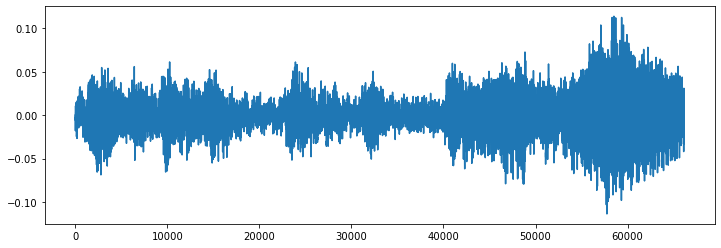

In [11]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [12]:
mfcc=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfcc.shape)

(40, 130)


In [13]:
mfcc

array([[-357.62897  , -348.01428  , -313.92914  , ..., -313.80374  ,
        -309.4827   , -298.71747  ],
       [ 142.51242  ,  127.13782  ,  112.66728  , ...,  124.23071  ,
         129.24225  ,  131.34424  ],
       [ -10.308102 ,  -10.449833 ,  -19.639755 , ...,  -14.168493 ,
         -15.471186 ,  -12.838678 ],
       ...,
       [   9.406958 ,   10.214735 ,    7.9070444, ...,   -0.378968 ,
          -3.1280732,   -3.5267274],
       [  -8.709026 ,   -6.3272905,   -9.904915 , ...,  -19.686235 ,
         -15.780066 ,   -9.537672 ],
       [ -10.415348 ,  -14.213655 ,  -18.584616 , ...,   13.066643 ,
          11.45553  ,   11.806913 ]], dtype=float32)

In [75]:
from librosa import feature
fn_list_i = [
    feature.chroma_stft,
    feature.spectral_centroid,
    feature.spectral_bandwidth,
    feature.spectral_rolloff,
    feature.chroma_cqt,
    feature.chroma_cens,
    feature.mfcc,
    feature.spectral_contrast,
    feature.poly_features,
    feature.tonnetz
]
  
fn_list_ii = [
    feature.rms,
    feature.zero_crossing_rate,
    feature.spectral_flatness,
]

def get_feature_vector(filename,classValue):
    y,sr=librosa.load(filename)
    feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
    feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii]

    feature_vector =   feat_vect_i + feat_vect_ii  
    feature_vector.append(classValue)
    return feature_vector

In [79]:
norm_audios_feat = []
for i in MAIN_FOLDER:
    SUB_FOLDER=os.path.join(os.getcwd(),i+"/IRMAS dataset/IRMAS-TrainingData")
    for j in os.listdir(SUB_FOLDER):
        files=os.path.join(SUB_FOLDER,j)
        for k in os.listdir(files):
            file_name=SUB_FOLDER+"/"+j+"/"+k
            final_class_labels=j
            feature_vector=get_feature_vector(file_name,identifier[j])
            norm_audios_feat.append(feature_vector)  
            print(".", end= " ")

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [80]:
norm_audios_feat[500:510]

[[0.20974986,
  1582.8861069379811,
  1498.181908206626,
  2848.6771334134614,
  0.4592835833267395,
  0.2554255413803821,
  -12.919432,
  26.429404696174256,
  0.5699119493480184,
  -0.010716485137524849,
  0.053666245,
  0.10061974158653846,
  0.00083612546,
  1],
 [0.3775253,
  1445.0865021444847,
  1530.300464450924,
  2733.64013671875,
  0.6321196385989644,
  0.28063987373805477,
  -5.1142488,
  23.18282893149702,
  0.7534090804604463,
  -0.0016255426850482954,
  0.052900646,
  0.09898963341346154,
  0.0014282869,
  1],
 [0.23989241,
  953.3133480095248,
  1187.5380502830449,
  1642.8177584134614,
  0.4266610601225687,
  0.24252377280751186,
  -5.5824523,
  24.44266885882014,
  0.885648785839289,
  0.008727288619314856,
  0.11531172,
  0.05532977764423077,
  0.000253168,
  1],
 [0.20995726,
  1133.4182130216932,
  1451.6412275420962,
  1957.2853440504807,
  0.420623696265581,
  0.23731713636812019,
  -2.7426913,
  27.08513186162545,
  0.6680095328056059,
  0.0010988014272783346,
 

In [81]:
norm_output = "Features.csv"
header =[
    "chroma_stft",
    "spectral_centroid",
    "spectral_bandwidth",
    "spectral_rolloff",
    "chroma_cqt",
    "chroma_cens",
    "mfcc",
    "spectral_contrast",
    "poly_features",
    "tonnetz",
    "rms",
    "zero_crossing_rate",
    "spectral_flatness",
    
]
with open(norm_output,"+w") as f:
 csv_writer = csv.writer(f, delimiter = ",")
 csv_writer.writerow(header)
 csv_writer.writerows(norm_audios_feat)